#1.Imports

In [ ]:
import numpy as np
import urllib.request
from io import BytesIO
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#2.Retrive Data

In [ ]:
def get_mnist():
    # Download the MNIST dataset
    url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
    response = urllib.request.urlopen(url)
    mnist_data = np.load(BytesIO(response.read()))

    images, labels = mnist_data["x_train"], mnist_data["y_train"]

    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = np.eye(10)[labels]

    return images, labels

#3.Storing the Data

In [ ]:
#To get images and labels into our pipeline
images, labels = get_mnist() #images is of 60000 images each of with 784 variables and labels has a shape of 60000 images of 10 labels

##3.1Define Weights

In [ ]:
wih = np.random.uniform(-0.5,0.5,(20,784))
who = np.random.uniform(-0.5,0.5,(10,20))
bih = np.zeros((20,1))
bho = np.zeros((10,1))

In [ ]:
learn_rate = 0.01
nr_correct = 0
epochs = 10

##3.2Training teh Neural Network

In [ ]:
#Training loop the Neural Network
for epoch in range(epochs):
  for img,lb in zip(images, labels):
    img.shape += (1,)
    lb.shape += (1,)

    #Forward Propagation
    h_pre = bih + wih@img #multiply the input layer with weight matrix and then sum with biased
    h = 1 / (1 + np.exp(-h_pre)) #Applying sigmoid activation fuction to normalize the values
    #Repating the procedure to get the output value
    o_pre = bho + who@h
    o = 1 / (1 + np.exp(-o_pre))

    #Cost/Error Calculation by comparing with the given label
    e = 1/len(o) * np.sum((o-1) **2, axis = 0)
    #To check whether our neural network classify the code correctly
    nr_correct += int(np.argmax(o) == np.argmax(lb))

    #Back Propagation
    delta_o = o - lb #difference between the output value and label value
    who += -learn_rate * delta_o@np.transpose(h) #Multiply the hidden layer Transposed output with delta_o and multiply with -learn_rate to update the error values
    bho += -learn_rate * delta_o #Since the bias weights always '1', there is no need to multiply

    #calculating the updated hiden layer values to input layer
    delta_h = np.transpose(who) @delta_o * (h * (1 - h))#Here we have to use the derivative of activation function to calculate with updated hidden layer values
    wih += -learn_rate * delta_h@np.transpose(img)
    bih += -learn_rate * delta_h

  #Accuracy of the model for each epoch
  print(f"Acc: {round((nr_correct / images.shape[0])*100, 2)}%")
  nr_correct = 0


Acc: 86.29%
Acc: 92.17%
Acc: 93.47%
Acc: 94.14%
Acc: 94.62%
Acc: 94.95%
Acc: 95.22%
Acc: 95.42%
Acc: 95.6%
Acc: 95.76%


##3.3Resuts

Enter a number (0 - 59999) or 'q' to quit: 0


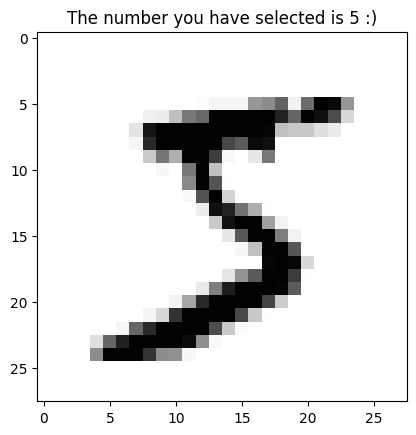

Enter a number (0 - 59999) or 'q' to quit: q
Quitting the program.


In [ ]:
# Show results
while True:
    try:
        user_input = input("Enter a number (0 - 59999) or 'q' to quit: ")

        if user_input.lower() == 'q':
            print("Quitting the program.")
            break  # Exit the loop if 'q' is entered

        index = int(user_input)

        if 0 <= index < len(images):
            img = images[index]
            plt.imshow(img.reshape(28, 28), cmap="Greys")

            img.shape += (1,)
            # Forward Propagation input -> hidden
            h_pre = bih + wih @ img.reshape(784, 1)
            h = 1 / (1 + np.exp(-h_pre))
            # Forward Propagation hidden -> output
            o_pre = bho + who @ h
            o = 1 / (1 + np.exp(-o_pre))
            plt.title(f"The number you have selected is {o.argmax()} :)")
            plt.show()
        else:
            print("Index out of bounds. Please enter a valid index.")
    except ValueError:
        print("Invalid input. Please enter a valid number or 'q' to quit.")

#4.Neural Network Architecture Vizualization

In [ ]:
model = Sequential([
    Dense(20, input_shape=(784,), activation='sigmoid', weights=[wih.T, bih.flatten()]),
    Dense(10, activation='sigmoid', weights=[who.T, bho.flatten()])
])

In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

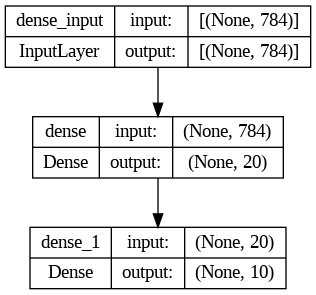

In [ ]:
# Visualize the initial architecture
plot_model(model, to_file='neural_network_architecture_initial.png', show_shapes=True)